In [2]:
import pandas as pd
import tensorflow as tf

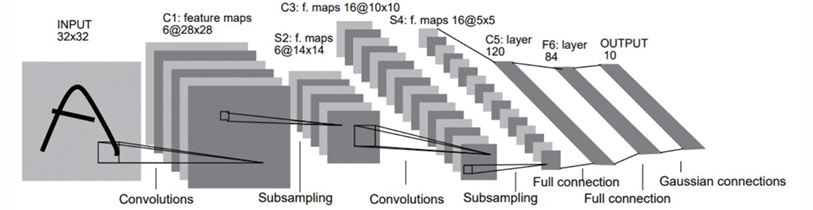

In [3]:
# 데이터 로드
(Xdata, Ydata), _ = tf.keras.datasets.mnist.load_data()
Xdata = Xdata.reshape(60000, 28, 28, 1) # 3차원이기 때문
Ydata = pd.get_dummies(Ydata) # 범주형 데이터를 수치형 데이터로 변환

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#모델 생성
X = tf.keras.layers.Input(shape=[28, 28, 1])
# why? mnist가 제공하는 이미지는 위 사진과 달리 28x28

# Convolution
H =  tf.keras.layers.Conv2D(6, kernel_size=5, padding = 'same',activation='swish')(X)
H =  tf.keras.layers.MaxPool2D()(H)
# padding을 통해 Convolution 과정에서의 크기 오차를 없앰 -> 28x28가 동일하기 때문

H =  tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H =  tf.keras.layers.MaxPool2D()(H)

H =  tf.keras.layers.Flatten()(H) #1차원으로
H =  tf.keras.layers.Dense(120, activation='swish')(H)
H =  tf.keras.layers.Dense(84, activation='swish')(H)
Y =  tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# 모델 학습
model.fit(Xdata, Ydata, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8455 - loss: 1.2502
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9755 - loss: 0.0883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0664
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0.0648
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0604
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0501
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9883 - loss: 0.0503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9885 - loss: 0.0529
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0499
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0495


In [6]:
# 예상 및 정확도 확인
pred = model.predict(Xdata[0:5])
print(pred.round(2))
Ydata[0:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True


1.0으로 높은 정확도를 보여주고 있음을 알 수 Oo